# Data preparetion

### Import

In [1]:
#Load the required libraries
import pandas as pd
import numpy as np
import seaborn as sns

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.model_selection as ms
from sklearn.svm import SVR
from sklearn.model_selection  import train_test_split
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from pandas.plotting import scatter_matrix
from sklearn.metrics import mean_squared_error
from math import sqrt

from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score

In [14]:
import os
os.getcwd()

'/'

In [17]:
os.chdir('/Users/lijiaze/Desktop/2022-2/CITS5553/model/')

### Load data

#### load whole data

In [33]:
#Load the data
df = pd.read_csv("wba_data_CLEAN.csv")

#View the data
df.head()

,Unnamed: 0,Subject,Gender,AgeY,ECV,TPP,SC,TympType,OAE1,OAE1.4,...,f(6168.8433),f(6349.6042),f(6535.6618),f(6727.1713),f(6924.2925),f(7127.1897),f(7336.0323),f(7550.9945),f(7772.2555),f(8000.0000)
0,0,8,0,9.333333,1.08,-189.0,0.52,1,3.0,10.0,...,0.5370,0.4869,0.4301,0.4080,0.3804,0.3291,0.2951,0.2530,0.2282,0.2003
1,1,22,0,9.500000,1.28,-49.0,1.28,0,7.0,4.0,...,0.2636,0.2578,0.2443,0.2549,0.2604,0.2397,0.2299,0.2048,0.1917,0.1659
2,2,24,1,9.833333,1.26,-27.0,0.87,0,9.0,12.0,...,0.4269,0.4142,0.3910,0.3799,0.3740,0.3536,0.3473,0.3237,0.3056,0.2881
3,3,31,0,9.916667,0.64,-8.0,0.60,0,13.0,9.0,...,0.0077,0.0123,0.0066,0.0000,0.0126,0.0231,0.0405,0.0401,0.0391,0.0258
4,4,42,0,7.916667,0.92,-17.0,1.65,0,7.0,0.0,...,0.2332,0.2216,0.2228,0.2653,0.2596,0.2576,0.2838,0.3598,0.3953,0.3642


In [34]:
# Remove 'Unnamed: 0' and subject column
wba_data = df.drop(["Unnamed: 0", "Subject"], axis=1)

wba_data.head()

,Gender,AgeY,ECV,TPP,SC,TympType,OAE1,OAE1.4,OAE2,OAE2.8,...,f(6168.8433),f(6349.6042),f(6535.6618),f(6727.1713),f(6924.2925),f(7127.1897),f(7336.0323),f(7550.9945),f(7772.2555),f(8000.0000)
0,0,9.333333,1.08,-189.0,0.52,1,3.0,10.0,18.0,14.0,...,0.5370,0.4869,0.4301,0.4080,0.3804,0.3291,0.2951,0.2530,0.2282,0.2003
1,0,9.500000,1.28,-49.0,1.28,0,7.0,4.0,9.0,5.0,...,0.2636,0.2578,0.2443,0.2549,0.2604,0.2397,0.2299,0.2048,0.1917,0.1659
2,1,9.833333,1.26,-27.0,0.87,0,9.0,12.0,8.0,12.0,...,0.4269,0.4142,0.3910,0.3799,0.3740,0.3536,0.3473,0.3237,0.3056,0.2881
3,0,9.916667,0.64,-8.0,0.60,0,13.0,9.0,13.0,11.0,...,0.0077,0.0123,0.0066,0.0000,0.0126,0.0231,0.0405,0.0401,0.0391,0.0258
4,0,7.916667,0.92,-17.0,1.65,0,7.0,0.0,2.0,12.0,...,0.2332,0.2216,0.2228,0.2653,0.2596,0.2576,0.2838,0.3598,0.3953,0.3642


In [35]:
# freqs = [f for f in features if f[:2] == "f("]
frequency = wba_data.iloc[:,14:138]
frequency_list = list(frequency.columns)
frequency_list

['f(226.0000)',
 'f(257.3256)',
 'f(280.6155)',
 'f(297.3018)',
 'f(324.2099)',
 'f(343.4884)',
 'f(363.9133)',
 'f(385.5527)',
 'f(408.4789)',
 'f(432.7683)',
 'f(458.5020)',
 'f(471.9372)',
 'f(500.0000)',
 'f(514.6511)',
 'f(545.2539)',
 'f(561.2310)',
 'f(577.6763)',
 'f(594.6036)',
 'f(629.9605)',
 'f(648.4198)',
 'f(667.4199)',
 'f(686.9768)',
 'f(707.1068)',
 'f(727.8266)',
 'f(749.1535)',
 'f(771.1054)',
 'f(793.7005)',
 'f(816.9577)',
 'f(840.8964)',
 'f(865.5366)',
 'f(890.8987)',
 'f(917.0040)',
 'f(943.8743)',
 'f(971.5319)',
 'f(1000.0000)',
 'f(1029.3022)',
 'f(1059.4631)',
 'f(1090.5077)',
 'f(1122.4620)',
 'f(1155.3527)',
 'f(1189.2071)',
 'f(1224.0535)',
 'f(1259.9210)',
 'f(1296.8396)',
 'f(1334.8399)',
 'f(1373.9536)',
 'f(1414.2136)',
 'f(1455.6532)',
 'f(1498.3071)',
 'f(1542.2108)',
 'f(1587.4011)',
 'f(1633.9155)',
 'f(1681.7928)',
 'f(1731.0731)',
 'f(1781.7974)',
 'f(1834.0081)',
 'f(1887.7486)',
 'f(1943.0639)',
 'f(2000.0000)',
 'f(2058.6045)',
 'f(2118.9262)

#### load train and test data

In [18]:
#Load the data
X_train = pd.read_csv("X_train.csv")
X_test = pd.read_csv("X_test.csv")
y_train = pd.read_csv("y_train.csv")
y_test = pd.read_csv("y_test.csv")

#View the data
X_train.head()

,Gender,AgeY,ECV,TPP,SC,TympType,OAE1,OAE1.4,OAE2,OAE2.8,...,f(6168.8433),f(6349.6042),f(6535.6618),f(6727.1713),f(6924.2925),f(7127.1897),f(7336.0323),f(7550.9945),f(7772.2555),f(8000.0000)
0,1,8.583333,0.89,-151.0,2.53,1,0.0,5.0,9.2,11.7,...,0.3955,0.3583,0.2997,0.2709,0.2544,0.1956,0.1648,0.1158,0.1083,0.0542
1,1,9.833333,0.81,-63.0,1.32,0,8.1,20.8,14.7,6.9,...,0.4592,0.4006,0.3508,0.3381,0.2983,0.2789,0.2655,0.3118,0.3039,0.3022
2,0,10.083333,1.50,-28.0,0.56,0,10.4,15.4,15.6,9.9,...,0.2600,0.2409,0.2002,0.2064,0.2190,0.1961,0.2076,0.1994,0.2084,0.1099
3,1,8.666667,1.15,3.0,1.07,0,10.6,15.1,15.0,7.8,...,0.5128,0.4605,0.4126,0.4001,0.3634,0.3378,0.3084,0.3156,0.3042,0.2912
4,1,8.583333,1.03,-10.0,0.43,0,3.7,11.5,7.4,5.7,...,0.0000,0.0034,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


### Visualization

In [36]:
def assess_freqs(wba_data, freq_cols, selected, title = "Selected Frequencies"):
    """
    wba_data: Full dataset
    freq_cols: List of all frequency column names
    selected: List of selected frequencies
    """

    # Creating melted dataframe (long format) for plotting
    overall_pof_df = wba_data[['OverallPoF'] + freq_cols]
    overall_pof_df = overall_pof_df.replace({'OverallPoF':{0: 'Pass', 1: 'Fail'}})
    overall_pof_df = overall_pof_df.groupby('OverallPoF').mean()
    overall_pof_df = overall_pof_df.melt(ignore_index=False)
    overall_pof_df = overall_pof_df.reset_index()

    # Plotting
    ax = sns.pointplot(x='variable', y='value', hue='OverallPoF', data=overall_pof_df)

    # Adding vertical lines at selected frequencies
    position = 0
    for freq in freq_cols:
        if freq in selected:
            ax.axvline(x=position, ls='--', color='red')
        position += 1

    sns.set(rc={'figure.figsize':(20,10)})

    # Rotate x-axis labels
    # ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")

    ax.set(title = title)

    # Show only every 2 tick labels on x-axis
    # plt.setp(ax.get_xticklabels()[::2], visible=False)

    plt.tight_layout()
    plt.show();


### only use the feature after feature selecting

从feature selection.ipynb文件中我们就已经得到用第四种方法（xgboost）来进行feature selection得到的结果最好，所以这里我们直接使用第四种方法来筛选frequencies，最终的到20个frequencies

In [19]:
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
import shap
import category_encoders as ce

import xgboost as xgb

/Users/lijiaze/opt/anaconda3/envs/cits5508/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [28]:
frequency_train = X_train.iloc[:,13:138]
frequency_test = X_test.iloc[:,13:138]

In [29]:
encoder = ce.LeaveOneOutEncoder(return_df=True)
X_train_loo = encoder.fit_transform(frequency_train, y_train)
X_test_loo = encoder.transform(frequency_test)

In [30]:
model = xgb.XGBRegressor(n_estimators=500, max_depth=5, eta=0.05)
model.fit(X_train_loo, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False, eta=0.05,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.0500000007, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=500, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0, ...)

Text(0.5, 1.0, 'Feature Importance')

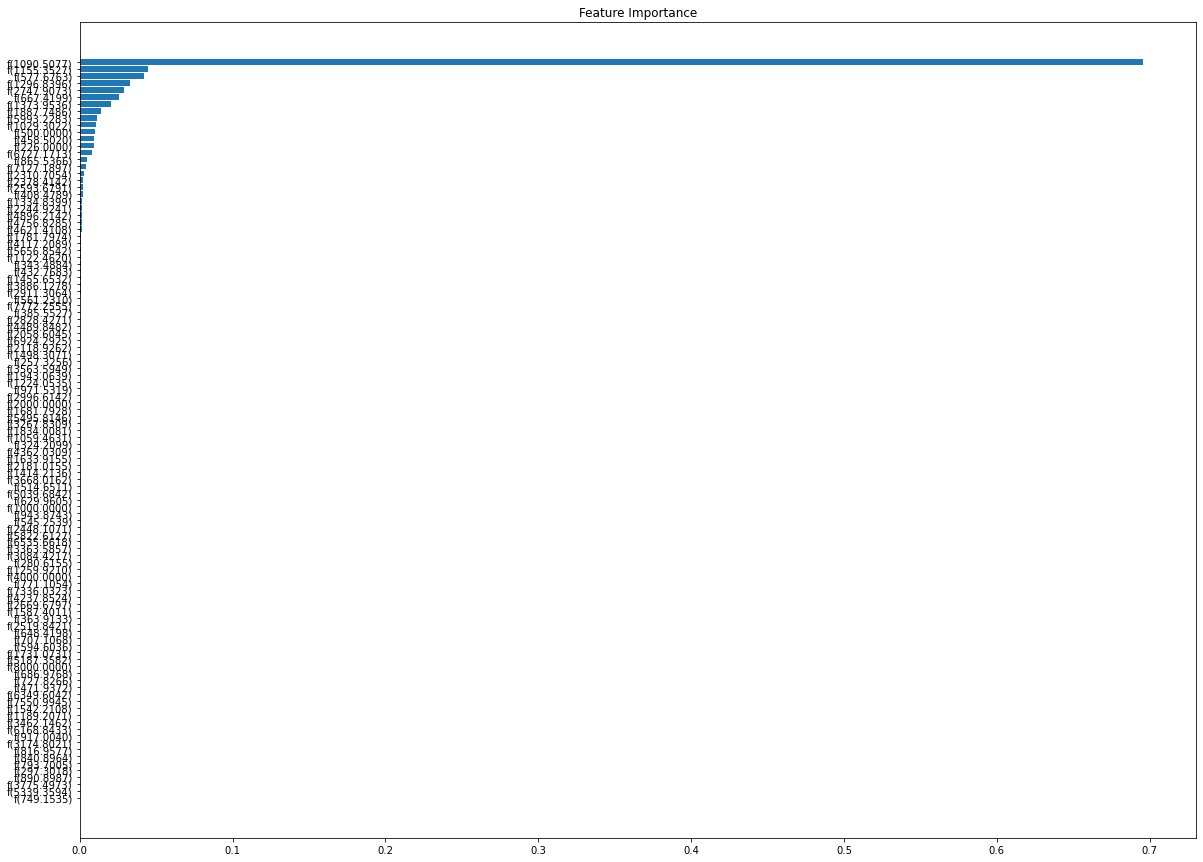

In [39]:
feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(20, 15))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(frequency_test.columns)[sorted_idx])
plt.title('Feature Importance')

In [40]:
sorted_idx=sorted_idx[-20:]
f_list=list(np.array(frequency_test.columns)[sorted_idx])
f_list

['f(408.4789)',
 'f(2593.6791)',
 'f(2378.4142)',
 'f(2310.7054)',
 'f(7127.1897)',
 'f(865.5366)',
 'f(6727.1713)',
 'f(226.0000)',
 'f(458.5020)',
 'f(500.0000)',
 'f(1029.3022)',
 'f(5993.2283)',
 'f(1887.7486)',
 'f(1373.9536)',
 'f(667.4199)',
 'f(2747.9073)',
 'f(1296.8396)',
 'f(577.6763)',
 'f(1155.3527)',
 'f(1090.5077)']

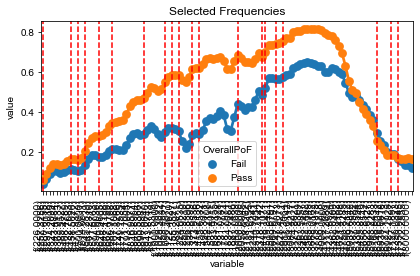

In [41]:
assess_freqs(wba_data, frequency_list, f_list)

现在我们得到了f_list，也就是我们将要选择的相关性最高的前20个频率。

### train and teat sets after feature selection

'TPP', 'TympType', 'OAE1', 'OAE1.4', 'OAE2', 'OAE2.8', 'OAE4'

In [49]:
X_train = pd.concat([X_train.loc[:,['TPP', 'TympType', 'OAE1', 'OAE1.4', 'OAE2', 'OAE2.8', 'OAE4']],X_train[f_list]],axis=1)
X_test = pd.concat([X_test.loc[:,['TPP', 'TympType', 'OAE1', 'OAE1.4', 'OAE2', 'OAE2.8', 'OAE4']],X_test[f_list]],axis=1)

,TPP,TympType,OAE1,OAE1.4,OAE2,OAE2.8,OAE4,f(408.4789),f(2593.6791),f(2378.4142),...,f(1029.3022),f(5993.2283),f(1887.7486),f(1373.9536),f(667.4199),f(2747.9073),f(1296.8396),f(577.6763),f(1155.3527),f(1090.5077)
0,-151.0,1,0.0,5.0,9.2,11.7,5.9,0.0538,0.6712,0.4938,...,0.2009,0.4621,0.3844,0.1865,0.1433,0.7555,0.1841,0.0907,0.2103,0.2344
1,-63.0,0,8.1,20.8,14.7,6.9,8.3,0.0689,0.8478,0.7828,...,0.4167,0.4768,0.8366,0.4787,0.2103,0.8399,0.5119,0.1542,0.4387,0.4141
2,-28.0,0,10.4,15.4,15.6,9.9,10.7,0.2371,0.6491,0.6827,...,0.4437,0.2779,0.5040,0.5173,0.3734,0.6188,0.5211,0.3276,0.5004,0.5038
3,3.0,0,10.6,15.1,15.0,7.8,4.0,0.1050,0.6001,0.6846,...,0.5456,0.5285,0.6283,0.6200,0.2664,0.5698,0.5979,0.2041,0.5736,0.5528
4,-10.0,0,3.7,11.5,7.4,5.7,8.5,0.1336,0.4592,0.3856,...,0.5451,0.0026,0.4929,0.5128,0.3649,0.4908,0.5497,0.2672,0.5757,0.5824


In [51]:
X_train

,TPP,TympType,OAE1,OAE1.4,OAE2,OAE2.8,OAE4,f(408.4789),f(2593.6791),f(2378.4142),...,f(1029.3022),f(5993.2283),f(1887.7486),f(1373.9536),f(667.4199),f(2747.9073),f(1296.8396),f(577.6763),f(1155.3527),f(1090.5077)
0,-151.0,1,0.0,5.0,9.2,11.7,5.9,0.0538,0.6712,0.4938,...,0.2009,0.4621,0.3844,0.1865,0.1433,0.7555,0.1841,0.0907,0.2103,0.2344
1,-63.0,0,8.1,20.8,14.7,6.9,8.3,0.0689,0.8478,0.7828,...,0.4167,0.4768,0.8366,0.4787,0.2103,0.8399,0.5119,0.1542,0.4387,0.4141
2,-28.0,0,10.4,15.4,15.6,9.9,10.7,0.2371,0.6491,0.6827,...,0.4437,0.2779,0.5040,0.5173,0.3734,0.6188,0.5211,0.3276,0.5004,0.5038
3,3.0,0,10.6,15.1,15.0,7.8,4.0,0.1050,0.6001,0.6846,...,0.5456,0.5285,0.6283,0.6200,0.2664,0.5698,0.5979,0.2041,0.5736,0.5528
4,-10.0,0,3.7,11.5,7.4,5.7,8.5,0.1336,0.4592,0.3856,...,0.5451,0.0026,0.4929,0.5128,0.3649,0.4908,0.5497,0.2672,0.5757,0.5824
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,-24.0,0,16.5,11.4,11.4,10.1,12.3,0.1114,0.9131,0.7935,...,0.5671,0.5035,0.7974,0.7759,0.2727,0.9649,0.7531,0.1964,0.6968,0.6461
187,4.0,0,18.8,13.3,14.0,11.9,8.9,0.1129,0.6103,0.6000,...,0.5116,0.3930,0.7333,0.5679,0.2718,0.6064,0.5478,0.1983,0.5380,0.5478
188,-22.0,0,23.5,15.9,11.1,14.2,14.4,0.1076,0.8398,0.7519,...,0.4321,0.1993,0.6208,0.5982,0.2433,0.8812,0.5673,0.1776,0.4955,0.4720
189,-209.0,1,0.0,10.0,14.0,8.0,0.0,0.1297,0.3052,0.3908,...,0.2563,0.0000,0.4735,0.1804,0.1991,0.2482,0.2077,0.1943,0.2125,0.2545


In [52]:
X_test

,TPP,TympType,OAE1,OAE1.4,OAE2,OAE2.8,OAE4,f(408.4789),f(2593.6791),f(2378.4142),...,f(1029.3022),f(5993.2283),f(1887.7486),f(1373.9536),f(667.4199),f(2747.9073),f(1296.8396),f(577.6763),f(1155.3527),f(1090.5077)
0,-11.0,0,11.5,27.4,9.6,6.0,9.2,0.2284,0.6784,0.6252,...,0.9315,0.3433,0.5636,0.7442,0.5310,0.7210,0.7940,0.4128,0.9246,0.9544
1,-8.0,0,14.0,17.6,17.7,7.6,6.2,0.2304,0.4966,0.5483,...,0.4562,0.2287,0.6087,0.5521,0.3515,0.4621,0.5481,0.3113,0.5132,0.5049
2,-16.0,0,16.2,9.8,8.8,17.2,23.1,0.1865,0.8640,0.7116,...,0.8540,0.1569,0.6011,0.7677,0.4840,0.9162,0.7790,0.3650,0.8214,0.8624
3,-34.0,0,15.1,20.2,17.8,7.4,7.0,0.1742,0.7097,0.7218,...,0.5060,0.5813,0.8344,0.7748,0.3371,0.6885,0.6994,0.2778,0.5813,0.5557
4,-6.0,0,5.0,5.0,12.0,13.0,11.0,0.2256,0.9472,0.8525,...,0.6774,0.3439,0.7051,0.6109,0.3775,0.9607,0.6136,0.3198,0.6399,0.6792
5,-33.0,0,11.0,7.0,7.0,8.0,8.0,0.1712,0.5817,0.6754,...,0.5757,0.0000,0.7295,0.6456,0.4065,0.5468,0.6074,0.3193,0.5578,0.5865
6,-233.0,1,-2.0,1.4,-1.2,2.7,-1.0,0.1684,0.5193,0.5450,...,0.2533,0.1375,0.3663,0.2221,0.2388,0.4534,0.2216,0.1971,0.2715,0.2922
7,1.0,0,8.4,12.9,15.3,15.1,14.0,0.2271,0.9612,0.8924,...,0.5074,0.4657,0.8958,0.5597,0.3983,0.9876,0.5264,0.3831,0.5096,0.4926
8,0.0,0,6.0,6.0,6.0,15.0,10.0,0.1613,0.6292,0.6475,...,0.4526,0.4897,0.7550,0.5522,0.3654,0.6579,0.5246,0.3100,0.4900,0.4839
9,-6.0,0,19.8,19.5,24.1,18.4,18.1,0.1432,0.9370,0.8342,...,0.7065,0.1980,0.6452,0.7152,0.3526,0.9557,0.7724,0.2533,0.7950,0.7758


# Model Fitting - Original dataset

## Decision Tree

## Random forest

# Model Fitting - Generated Dateset